<a href="https://www.kaggle.com/code/milicaradisavljevic/kickstarter-projects-nn?scriptVersionId=194054710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the data


The database contains information about projects launched on the popular Kickstarter platform and their success.  Kickstarter allows creators to present their projects to the public, seeking funding to bring their ideas to life. The data encompasses a wide range of project categories, including technology, film, music, art, games, publishing, and more. Data are collected from Kickstarter Platform.

Key Attributes:
- ID: Project ID;
- name: Project name;
- category: Sub-category;
- main_category: Main category of campaign;
- currency: Currency used to support;
- deadline: The date by which the project must reach its funding goal;
- goal: The funding goal is the amount of money that a creator needs to complete their project;
- launched: The date and time when the project was launched;
- pledged: The amount pledged by "crowd";
- state: The current status of the project (e.g., successful, failed, canceled, live, suspended);
- backers: The number of backers who have pledged money to the project;
- country: The country from which the project was launched;
- usd_pledged: The amount of money pledged in US dollars, which is standardized to facilitate comparison across projects using different currencies;
- usd_pledged_real;
- usd_goal_real: The funding goal in US dollars, standardized for the same reason as USD Pledged;

Fature descriptions taken from: https://www.kaggle.com/datasets/kemical/kickstarter-projects


# Objectives

- Main goal is to train a model that will be able to predict whether a Kickstarter project will be successfull or not. We will use a Neural Network to make our predictions. 
- The secondary goal is to explore the data, clean it and do a basic EDA analysis.


# Import the libraries

In [1]:
import pandas as pd #managing the data
import numpy as np #mathematical operations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2024-08-25 19:31:57.201298: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 19:31:57.201472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 19:31:57.362592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the data

In [2]:
data = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


The dataset contains 378661 entries and 15 columns. We have 8 categorical and 7 numeric columns. 

Null values are presenty in "name" and "usd_pledged" columns. In "name" column in a small number, but that column is certainly not of interest to us for further analysis, so we will remove it together with the ID column after EDA analysis. In "usd_pledged" we have 3797 null values so we will fill missing values in the column with the mean value of that column.



In [4]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
# Fill missing values in the 'usd pledged' column with the mean value of the 'usd pledged' column
data['usd pledged'] = data['usd pledged'].fillna(data['usd pledged'].mean())

In [6]:
#checking for duplicates 
data.duplicated().sum()

0

Excellent, no duplicates were found in the dataset.

In [7]:
#categorical columns that we will investigate
data_categorical = data[["category", "main_category", "currency", "state", "country"]]
#Return number of unique values in the object
data_categorical.nunique()

category         159
main_category     15
currency          14
state              6
country           23
dtype: int64

In [8]:
for i in data_categorical.columns:
    print(i.upper(), ":", data_categorical[i].unique())

CATEGORY : ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'Sound' 'St

### Category

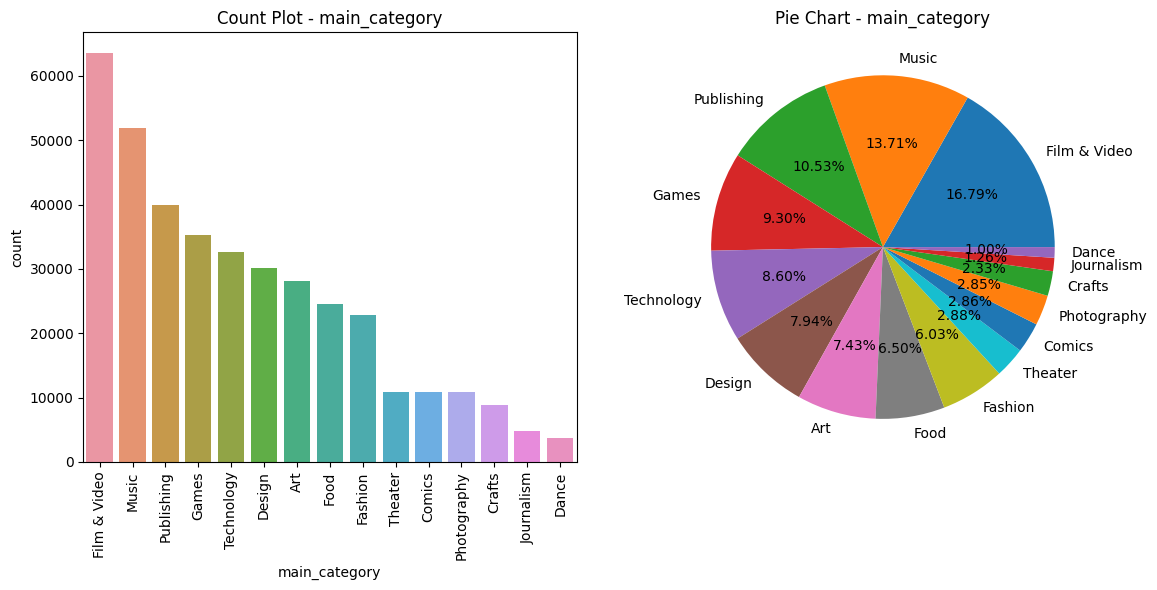

In [9]:
variable = "main_category"

# Figure size
plt.figure(figsize=(12, 6))  

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=data_categorical, order=data_categorical["main_category"].value_counts().index)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = data_categorical[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


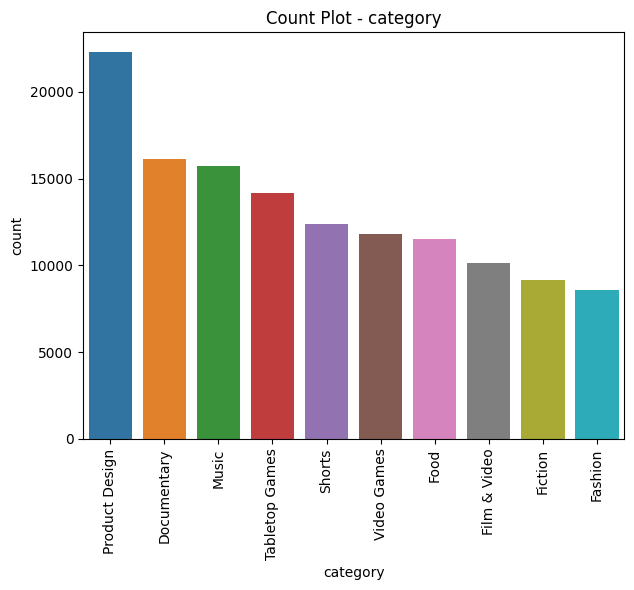

In [10]:
variable = "category"

# Get the top 10 categories by count
top_categories = data_categorical[variable].value_counts().head(10).index

# Count plot
plt.figure(figsize=(12, 6))  

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=data_categorical[data_categorical[variable].isin(top_categories)], order=top_categories)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The most popular main-categories are Film & Video, Music and Publishing. In other view, the most popular (sub)category is Product Design with 5%, followed by Documentary, Music, Tabletop Games, Shorts, Food, Video Games, Film and Video, Fiction and Fashion.

### Currency

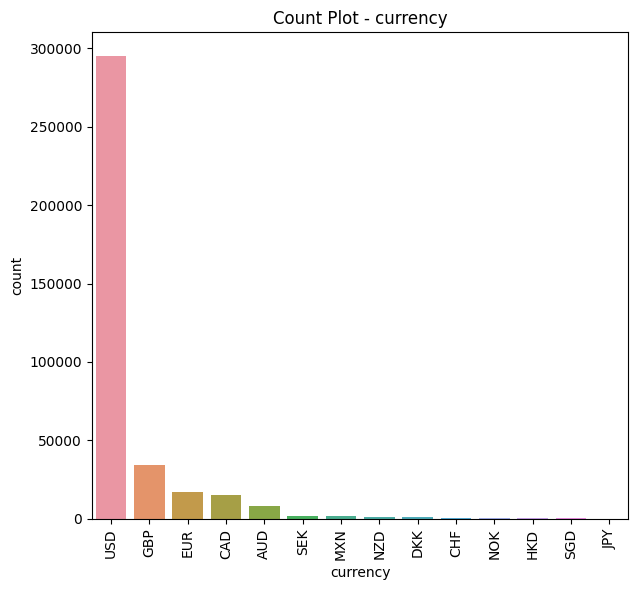

In [11]:
variable = "currency"

# Figure size
plt.figure(figsize=(12, 6))  

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=data_categorical, order=data_categorical["currency"].value_counts().index)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The most used currency to support the projects is USD with 79%, far behind are GBP and EUR and other currencies.

### Project state

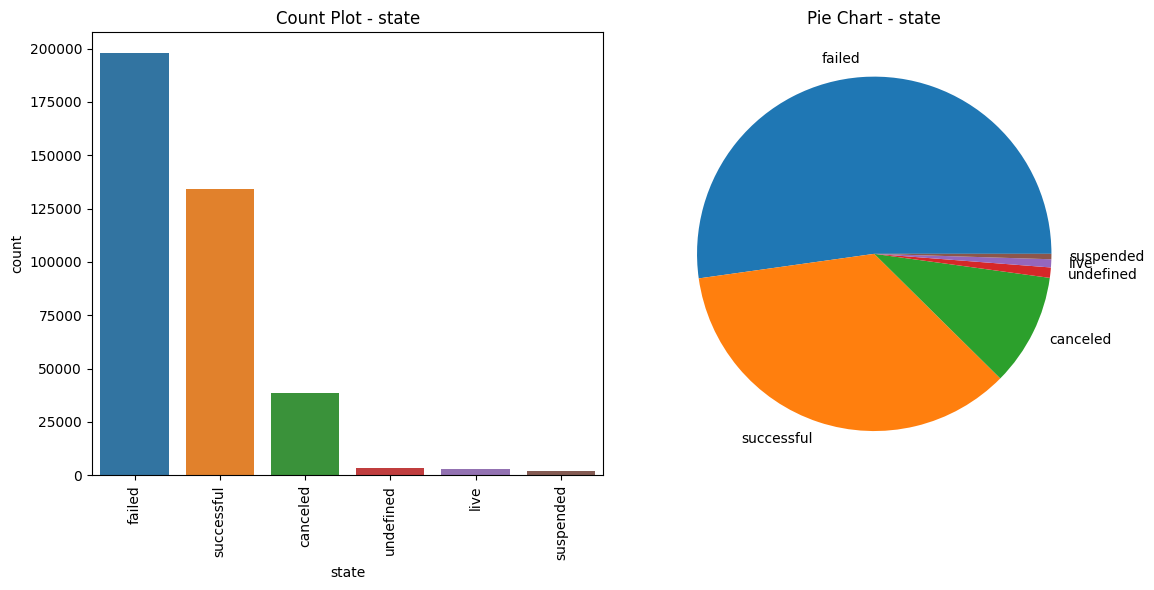

In [12]:
variable = "state"

# Figure size
plt.figure(figsize=(12, 6))  

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=data_categorical, order=data_categorical["state"].value_counts().index)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = data_categorical[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct=None)
plt.title(f"Pie Chart - {variable}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Most of the projects in this database were completed with "failed" and "successful", which is great, because these will be our values of interest in the future, so we will remove the other unique values. From the graph, we can see that 52% of projects on the Kickstarter platform failed, 35% succeeded, and in 3rd place were canceled projects with 10%.

In [13]:
data = data[data['state'].isin(['failed', 'successful'])].reset_index(drop=True)

In [14]:
data['state'].unique()

array(['failed', 'successful'], dtype=object)

### Country  

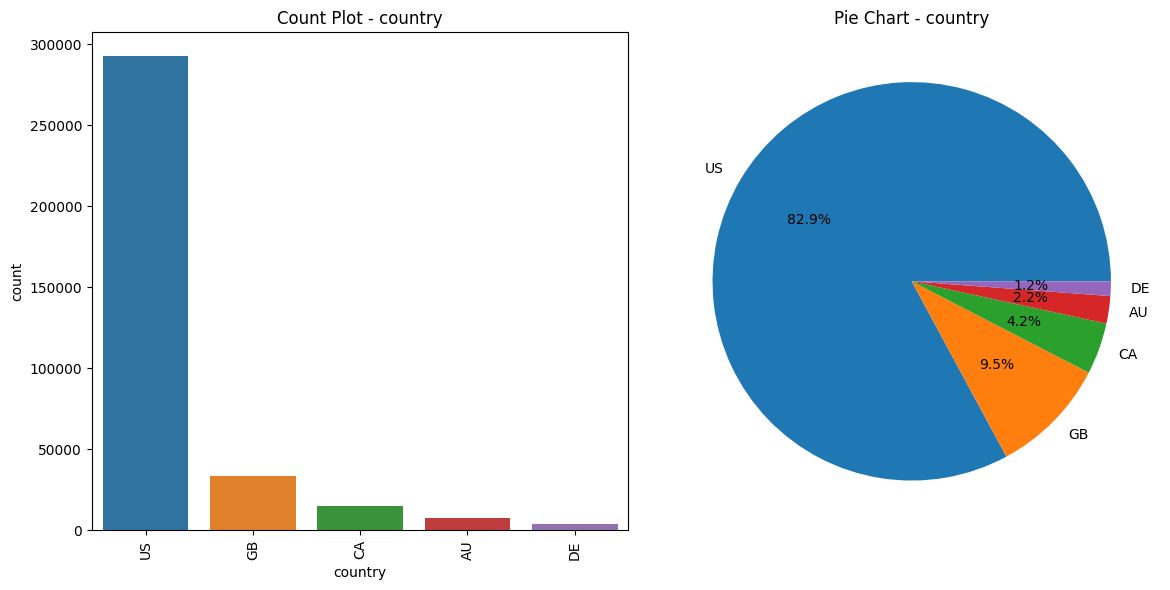

In [15]:
variable = "country"

# Get the top 5 categories by count
top_categories = data_categorical[variable].value_counts().head(5).index
filtered_data = data_categorical[data_categorical[variable].isin(top_categories)]

# Count Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=filtered_data, order=top_categories)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie Chart
plt.subplot(1, 2, 2)
counts = filtered_data[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')  # Display percentage labels
plt.title(f"Pie Chart - {variable}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The top 5 countries from which projects are launched are US(United States) with 83%, GB(United Kingdom), CA(Canada), AU(Australia) and DE(Germany).

### Goal

In [16]:
#checking descriptive statistic for numerical column goal
data["goal"].describe()

count    3.316750e+05
mean     4.425157e+04
std      1.117917e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

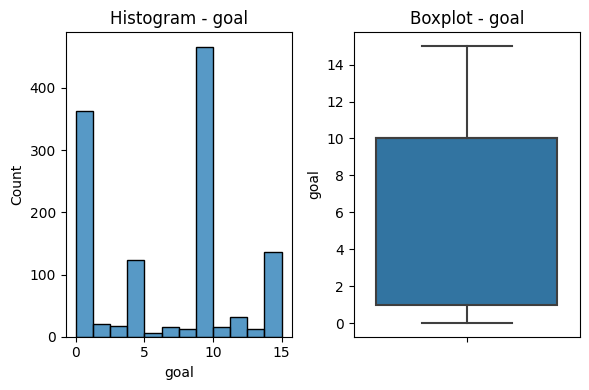

In [17]:
variable ="goal"

plt.figure(figsize = (6,4))

#histogram
#16.000 is 75% in descriptive statistic. We use it to improve plot
plt.subplot(1,2,1)
sns.histplot(x = variable, data = data[data["goal"]<16.000])
plt.title(f"Histogram - {variable}")

#boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=data[data["goal"]<16.000])
plt.title(f"Boxplot - {variable}")

#Adjust layout
plt.tight_layout()

#show the plots
plt.show()

The standard deviation is much larger than the mean, indicating significant variability in the goal values. This suggests the presence of outliers or extreme values.
The mean (44,251.57) is much higher than the median (5,000), indicating a right-skewed distribution with a long tail of higher values.
The maximum value (100,000,000) is extremely high compared to other statistics, which confirms the presence of significant outliers.

### Successful projects

In [18]:
# Filter for successful projects
successful_projects = data[data['state'] == 'successful']

# Sort by usd_goal_real in descending order
sorted_successful_projects = successful_projects.sort_values(by='usd_goal_real', ascending=False)

# Select the relevant columns
top_funded_successful_projects = sorted_successful_projects[['name', 'category','usd_goal_real']]

# Display the top funded successful projects
print(top_funded_successful_projects.head(10))

                                           name        category  usd_goal_real
311293                         Elite: Dangerous     Video Games     2015608.88
322870                                Shenmue 3     Video Games     2000000.00
130191          The Veronica Mars Movie Project  Narrative Film     2000000.00
78491   Bring Back MYSTERY SCIENCE THEATER 3000      Television     2000000.00
117808                        Camelot Unchained     Video Games     2000000.00
150048                          WISH I WAS HERE  Narrative Film     2000000.00
284056           Blue Mountain State: The Movie  Narrative Film     1500000.00
97868        The Newest Hottest Spike Lee Joint  Narrative Film     1250000.00
295564                        The Bards Tale IV     Video Games     1250000.00
124098                                Obduction     Video Games     1100000.00


The top 10 most paid and most successful projects are video games or narrative  film categories, where 2 video games are in first place: "Elite: Dangerous" and "Shenmue 3".


In [19]:
# Filter for successful projects in the "Product Design" category
product_design_successful = data[(data['state'] == 'successful') & (data['category'] == 'Product Design')]

# Sort by usd_goal_real in descending order
sorted_product_design_successful = product_design_successful.sort_values(by='usd_goal_real', ascending=False)

# Select the relevant columns ('name', 'state', 'usd_goal_real') and display the top projects
top_product_design_successful_projects = sorted_product_design_successful[['name', 'usd_goal_real']]

# Display the top funded successful projects in Product Design category
print(top_product_design_successful_projects.head(10))

                                                     name  usd_goal_real
189714             Pebble 2, Time 2 + All-New Pebble Core     1000000.00
60802    The Barisieur: Designer Coffee & Tea Alarm Clock      504748.62
828            Moment: Make Your iPhone 7 A Better Camera      500000.00
116638                         Creative computing for all      500000.00
137781   Pebble Time - Awesome Smartwatch, No Compromises      500000.00
237722             The Everyday Backpack, Tote, and Sling      500000.00
94553   Roost Laptop Stand | Free yourself from laptop...      475000.00
24381               Pakayak - The Ultimate Packable Kayak      427325.00
13581   Bia: Multi-Sport GPS Sports Watch with SOS Saf...      400000.00
145090                The next generation stylus - iPen 2      360000.00


In the most popular category "Product Design", the highest paying successfully completed projects are: Pebble 2, Time 2 + All-New Pebble Core, The Barisieur: Designer Coffee & Tea Alarm Clock, Moment: Make Your iPhone 7 A Better Camera, Creative computing for all, Pebble Time - Awesome Smartwatch, No Compromises, The Everyday Backpack, Tote, and Sling, Roost Laptop Stand | Free yourself from laptop..., Pakayak - The Ultimate Packable Kayak, Bia: Multi-Sport GPS Sports Watch with SOS Saf..., The next generation stylus - iPen 2.

After we have done our basic data exploration, we can remove the columns that are not important for our future analysis, columns ID and name.

In [20]:
data = data.drop(["ID", "name"], axis=1)

## Feature Engineering

- We will extract year and month from date-time columns ("deadline" and "launched") and this allows us to create new features that might be more meaningful or useful for analysis or predictive modeling tasks.
- ML models typically work with numeric data, so we'll convert datetime values to numeric values. Likewise, categorical values need to be converted. For the "state" column, we will use the Label encoder, and for the other categorical columns, we will use the One-Hot encoder.


In [21]:
# Extract the year from the 'deadline' column as a float
data['deadline_year'] = data['deadline'].apply(lambda x: float(x[0:4]))
# Extract the month from the 'deadline' column as a float
data['deadline_month'] = data['deadline'].apply(lambda x: float(x[5:7]))

# Extract the year from the 'launched' column as a float
data['launched_year'] = data['launched'].apply(lambda x: float(x[0:4]))
# Extract the month from the 'launched' column as a float
data['launched_month'] = data['launched'].apply(lambda x: float(x[5:7]))

# Drop 'deadline' and 'launched' columns
data = data.drop(['deadline', 'launched'], axis=1)

In [22]:
# Assuming 'data' is your pandas DataFrame
object_columns = data.select_dtypes(include=['object']).columns

# Print the object columns
print("Object columns:")
print(object_columns)

Object columns:
Index(['category', 'main_category', 'currency', 'state', 'country'], dtype='object')


In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'state' column
data['state'] = label_encoder.fit_transform(data['state'])

In [24]:
def onehot_encoder(data, columns, prefixes):
    encoded_data = data.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(encoded_data[column], prefix=prefix, dtype=int)
        encoded_data = pd.concat([encoded_data, dummies], axis=1)
        encoded_data = encoded_data.drop(column, axis=1)
    return encoded_data

In [25]:
encoded_data = onehot_encoder(
    data,
    ['category', 'main_category', 'currency', 'country'],
    ['cat', 'main_cat', 'curr', 'country']
)

In [26]:
data

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,0,0,GB,0.0,0.0,1533.95,2015.0,10.0,2015.0,8.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,0,15,US,100.0,2421.0,30000.00,2017.0,11.0,2017.0,9.0
2,Narrative Film,Film & Video,USD,45000.0,220.0,0,3,US,220.0,220.0,45000.00,2013.0,2.0,2013.0,1.0
3,Music,Music,USD,5000.0,1.0,0,1,US,1.0,1.0,5000.00,2012.0,4.0,2012.0,3.0
4,Restaurants,Food,USD,50000.0,52375.0,1,224,US,52375.0,52375.0,50000.00,2016.0,4.0,2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,Small Batch,Food,USD,6500.0,154.0,0,4,US,0.0,154.0,6500.00,2017.0,4.0,2017.0,3.0
331671,Narrative Film,Film & Video,USD,1500.0,155.0,0,5,US,155.0,155.0,1500.00,2011.0,7.0,2011.0,6.0
331672,Narrative Film,Film & Video,USD,15000.0,20.0,0,1,US,20.0,20.0,15000.00,2010.0,8.0,2010.0,7.0
331673,Technology,Technology,USD,15000.0,200.0,0,6,US,200.0,200.0,15000.00,2016.0,2.0,2016.0,1.0


In [27]:
encoded_data

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,0.0,1533.95,2015.0,10.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00,2017.0,11.0,2017.0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,220.0,0,3,220.0,220.0,45000.00,2013.0,2.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.0,0,1,1.0,1.0,5000.00,2012.0,4.0,2012.0,...,0,0,0,0,0,0,0,0,0,1
4,50000.0,52375.0,1,224,52375.0,52375.0,50000.00,2016.0,4.0,2016.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,6500.0,154.0,0,4,0.0,154.0,6500.00,2017.0,4.0,2017.0,...,0,0,0,0,0,0,0,0,0,1
331671,1500.0,155.0,0,5,155.0,155.0,1500.00,2011.0,7.0,2011.0,...,0,0,0,0,0,0,0,0,0,1
331672,15000.0,20.0,0,1,20.0,20.0,15000.00,2010.0,8.0,2010.0,...,0,0,0,0,0,0,0,0,0,1
331673,15000.0,200.0,0,6,200.0,200.0,15000.00,2016.0,2.0,2016.0,...,0,0,0,0,0,0,0,0,0,1


### Defining raw input and output

In [28]:
#target variable y
y = encoded_data["state"]

#features for training a ML model
X = encoded_data.drop("state", axis=1)

### Scaling Features

Before feeding data into the model, it’s often normalized using a Robust Scaler. This scaler adjusts the data based on the median and interquartile range (IQR), ensuring that the features are scaled in a way that is less sensitive to outliers. This helps the neural network learn more effectively by reducing the impact of extreme values and preserving the central distribution of the data.

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# Scaling the raw input features
X = scaler.fit_transform(X)

### Splitting the data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# Model

In [31]:
X.shape

(331675, 221)

To train the model that has the task of predicting whether the Kickstarter project will be successful or not, we used **Neural Networks**. A Neural Network has an input layer, hidden layers, and an output layer. Each layer is made up of neurons. Neurons in one layer are connected to neurons in the next layer through weights, which determine the strength of the connection.

Forward Propagation:
- The process starts by feeding input data into the input layer.
- The data is then passed forward through the network. At each neuron, the data is multiplied by weights, summed up, and then passed through an activation function (like ReLU, Sigmoid) to introduce non-linearity.
- This process continues through all hidden layers until the final output layer produces a prediction.

Loss Function:
- The network compares the prediction with the actual target using a loss function (Cross-Entropy). The loss function quantifies how far off the predictions are from the actual values.

Backpropagation:
- Backpropagation is the process where the network learns by adjusting its weights. It works by calculating the gradient of the loss function with respect to each weight.
- The gradients are then used to update the weights in the direction that reduces the loss, making the network’s predictions more accurate.
- This adjustment happens layer by layer, from the output layer back to the input layer.

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(221,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Early stopping** is a regularization technique used during the training of machine learning models, particularly neural networks, to prevent overfitting and improve generalization to unseen data. 

Early stopping monitors the model’s performance on a validation set (a subset of data not used in training). When the validation loss stops decreasing and starts to increase, it indicates that the model is beginning to overfit. Early stopping halts training at this point, before the model becomes too specialized to the training data.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
    verbose=1
)

Epoch 1/100
3628/3628 - 9s - 3ms/step - accuracy: 0.9802 - loss: 0.0546 - val_accuracy: 0.9839 - val_loss: 0.0660
Epoch 2/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9909 - loss: 0.0258 - val_accuracy: 0.9920 - val_loss: 0.0205
Epoch 3/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9921 - loss: 0.0213 - val_accuracy: 0.9915 - val_loss: 0.0222
Epoch 4/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9932 - loss: 0.0183 - val_accuracy: 0.9934 - val_loss: 0.0178
Epoch 5/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9936 - loss: 0.0169 - val_accuracy: 0.9941 - val_loss: 0.0164
Epoch 6/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9942 - loss: 0.0155 - val_accuracy: 0.9944 - val_loss: 0.0149
Epoch 7/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9946 - loss: 0.0145 - val_accuracy: 0.9935 - val_loss: 0.0170
Epoch 8/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9948 - loss: 0.0140 - val_accuracy: 0.9938 - val_loss: 0.0163
Epoch 9/100
3628/3628 - 7s - 2ms/step - accuracy: 0.9949 - loss: 0.0132 - val_accuracy: 

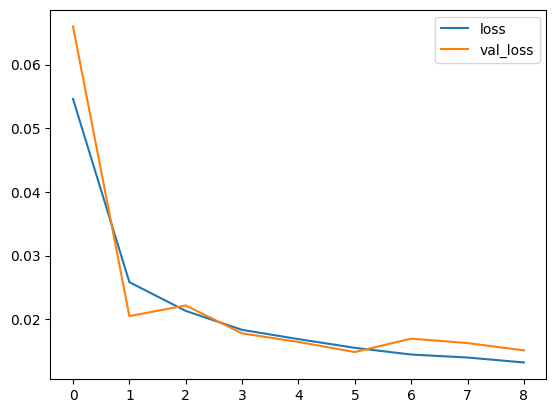

In [35]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping],
    verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Key Findings

- Model Performance: The model is performing excellently, with high accuracy and low loss on both training and validation sets.
- Generalization: The validation accuracy is consistently high, which indicates good generalization to new data.
- Early Stopping: The early stopping mechanism worked well to prevent overfitting and select the best model based on validation loss.
